In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')

%matplotlib inline

In [74]:
# Open the data
df = pd.read_excel('WorkPlaceSatisfactionSurveyData.xlsx')

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82 entries, 0 to 81
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   number                  82 non-null     int64  
 1   gender                  82 non-null     int64  
 2   age                     82 non-null     int64  
 3   family                  82 non-null     int64  
 4   education               81 non-null     float64
 5   years_of_service        80 non-null     float64
 6   salary                  82 non-null     int64  
 7   sat_management          82 non-null     int64  
 8   sat_colleques           81 non-null     float64
 9   sat_workingEnvironment  82 non-null     int64  
 10  sat_salary              82 non-null     int64  
 11  sat_tasks               82 non-null     int64  
 12  healtcare               47 non-null     float64
 13  holidayCabin            20 non-null     float64
 14  gym                     9 non-null      floa

In [76]:
# Count the number of male (1) and female (2) workers
gender_count = df['gender'].value_counts().reindex([1, 2], fill_value=0)

# Calculate the percentage of each gender
gender_percentage = (gender_count / gender_count.sum()) * 100

# Rename the index to reflect 1 as "Men" and 2 as "Women"
gender_percentage.index = ['Men', 'Women']

# Print the gender percentages
print("Gender Percentages:")
print(gender_percentage)


Gender Percentages:
Men      76.829268
Women    23.170732
Name: count, dtype: float64


In [77]:
# Define age bins and labels for the age ranges
age_bins = [18, 30, 42, 54, 66]  
age_labels = ['18-30', '30-42', '42-54', '54-66']

# Create a new column 'age_group' based on the age bins
df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels, right=False)

# Count the number of workers in each age group
age_group_count = df['age_group'].value_counts(sort=False)

# Print the counts
print("Age Group Count:")
print(age_group_count)


Age Group Count:
age_group
18-30    17
30-42    39
42-54    19
54-66     7
Name: count, dtype: int64


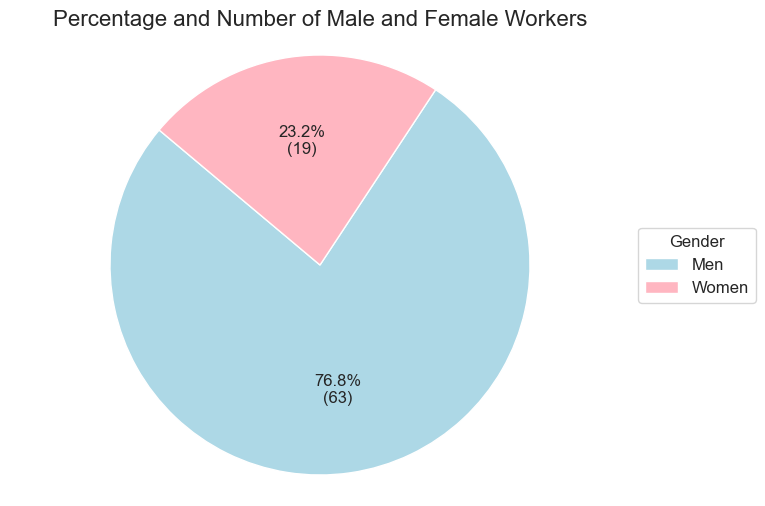

In [78]:
# Plotting a pie chart for gender percentages
plt.figure(figsize=(8, 6))

# Create the pie chart with custom label positions
wedges, texts, autotexts = plt.pie(gender_percentage, 
                                   labels=None, 
                                   autopct='%1.1f%%', 
                                   startangle=140, 
                                   colors=['lightblue', 'lightpink'])

# Loop through autotexts to add numerical values to the pie chart
for i, autotext in enumerate(autotexts):
    # Get the percentage and add the numerical count
    percentage_text = autotext.get_text()  # Get percentage text
    numerical_value = int(gender_count.iloc[i])  # Get numerical value of the gender
    autotext.set_text(f'{percentage_text}\n({numerical_value})')  # Add numerical value to the text
    autotext.set_fontsize(12)  # Adjust font size for the percentage and numerical values

# Draw the lines connecting the labels to the pie slices
for i, text in enumerate(texts):
    text.set_color(wedges[i].get_facecolor())  # Set label color to slice color
    text.set_fontsize(12)  # Adjust font size for labels
    # Move labels out
    text.set_position((text.get_position()[0] * 1.15, text.get_position()[1] * 1.15))  

# Add custom labels to the pie chart
plt.legend(wedges, gender_percentage.index, title="Gender", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1), fontsize=12)

# Set the title
plt.title('Percentage and Number of Male and Female Workers', fontsize=16)
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is a circle.

plt.show()


There seems to be a lot less women as employees. 

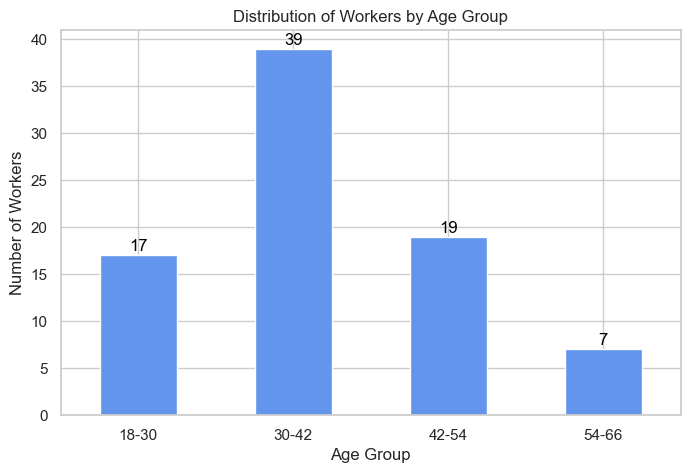

In [79]:
# Plot the age group distribution
plt.figure(figsize=(8, 5))
ax = age_group_count.plot(kind='bar', color='cornflowerblue')  # Assign plot to 'ax'
plt.title('Distribution of Workers by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Workers')
plt.xticks(rotation=0)

# Add labels on bars
for i in ax.patches:
    ax.annotate(f'{i.get_height()}', (i.get_x() + i.get_width() / 2, i.get_height()), 
                ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 3), textcoords='offset points')

plt.show()



C:\Users\leski\AppData\Local\Temp\ipykernel_3232\1174098911.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_gender_group = df.groupby(['age_group', 'gender']).size().unstack(fill_value=0)
C:\Users\leski\AppData\Local\Temp\ipykernel_3232\1174098911.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_gender_group = df.groupby(['age_group', 'gender']).size().unstack(fill_value=0)


Age Group and Gender Distribution:
gender      1   2
age_group        
18-30      16   1
30-42      28  11
42-54      14   5
54-66       5   2


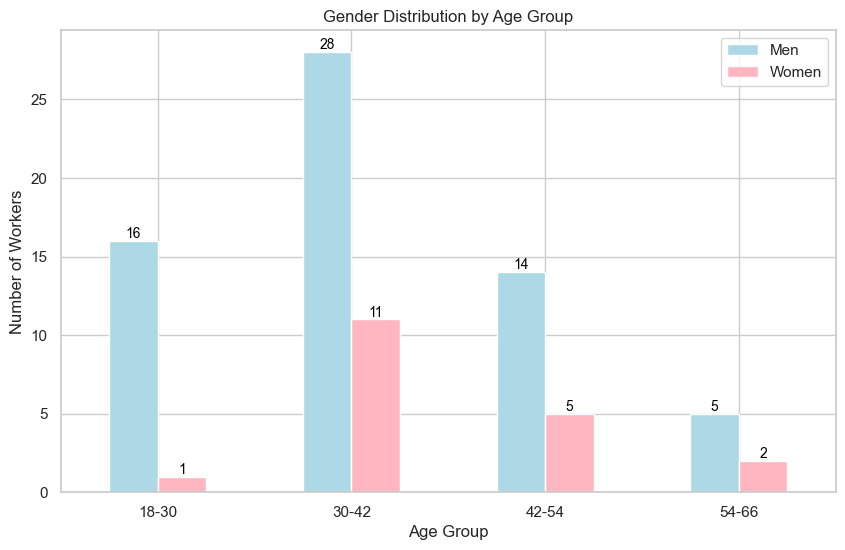

In [80]:
# Group by age group and gender, then count
age_gender_group = df.groupby(['age_group', 'gender']).size().unstack(fill_value=0)

# Print the table to see how many males and females are in each age group
print("Age Group and Gender Distribution:")
print(age_gender_group)

# Group by age group and gender, then count
age_gender_group = df.groupby(['age_group', 'gender']).size().unstack(fill_value=0)

# Plot the age group and gender distribution as a grouped bar chart
ax = age_gender_group.plot(kind='bar', color=['lightblue', 'lightpink'], figsize=(10, 6), position=0.5)
plt.title('Gender Distribution by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Workers')
plt.xticks(rotation=0)

# Adjust the legend to correctly reflect 1 = Male and 2 = Female
plt.legend(['Men', 'Women'])

# Add labels on bars for both genders
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=10, color='black')

plt.show()

Most employees are under 42 years old.

In [81]:
print(df['sat_salary'].isnull().sum())
print(df['sat_salary'].describe())

0
count    82.000000
mean      2.109756
std       1.111179
min       1.000000
25%       1.000000
50%       2.000000
75%       3.000000
max       5.000000
Name: sat_salary, dtype: float64


In [82]:
# Check the minimum and maximum salary to adjust the bins properly
min_salary = df['salary'].min()
max_salary = df['salary'].max()

print(f"Minimum Salary: {min_salary}")
print(f"Maximum Salary: {max_salary}")


Minimum Salary: 1521
Maximum Salary: 6278


Average Salary Satisfaction by Salary Group and Gender:
gender               1         2
salary_group                    
1500-3000     1.700000  2.789474
3000-4000     2.375000       NaN
4000-5000     3.000000       NaN
5000-6300     3.333333       NaN


C:\Users\leski\AppData\Local\Temp\ipykernel_3232\678824822.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  salary_satisfaction_group = df.groupby(['salary_group', 'gender'])['sat_salary'].mean().unstack()


<Figure size 1000x600 with 0 Axes>

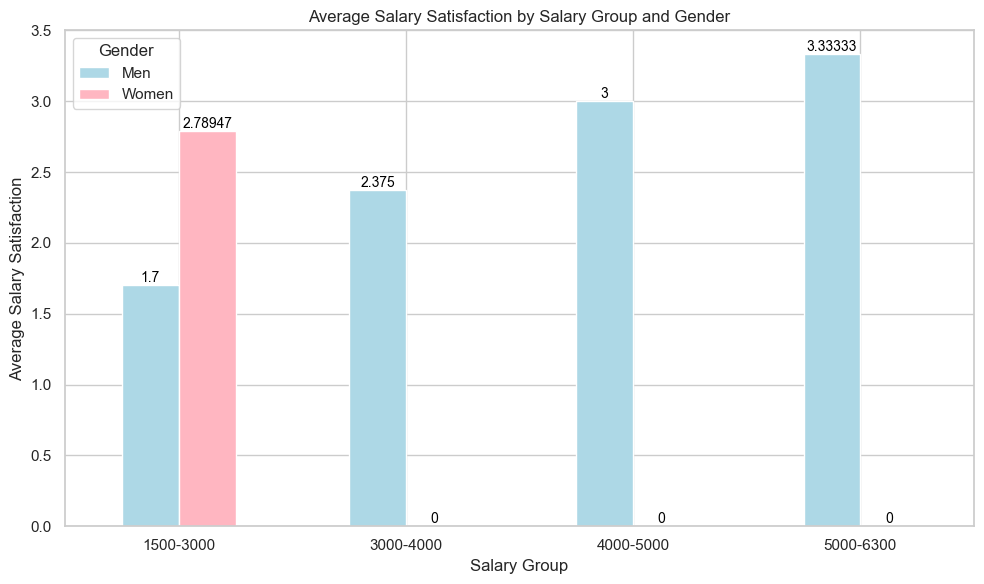

In [83]:
# Adjust salary bins to fit the actual salary range
salary_bins = [1500, 3000, 4000, 5000, 6300]  # Salary bins adjusted to the actual salary range
salary_labels = ['1500-3000', '3000-4000', '4000-5000', '5000-6300']  # Labels for the salary groups

# Create a new column 'salary_group' based on the salary bins
df['salary_group'] = pd.cut(df['salary'], bins=salary_bins, labels=salary_labels, right=False, include_lowest=True)

# Group by salary group and gender, and calculate the mean satisfaction with salary
salary_satisfaction_group = df.groupby(['salary_group', 'gender'])['sat_salary'].mean().unstack()

# Print the result to check the data
print("Average Salary Satisfaction by Salary Group and Gender:")
print(salary_satisfaction_group)

# Plot the grouped bar chart for salary satisfaction
plt.figure(figsize=(10, 6))
ax = salary_satisfaction_group.plot(kind='bar', color=['lightblue', 'lightpink'], figsize=(10, 6))

# Set plot labels and title
plt.title('Average Salary Satisfaction by Salary Group and Gender')
plt.xlabel('Salary Group')
plt.ylabel('Average Salary Satisfaction')
plt.xticks(rotation=0)

# Adjust the legend to correctly reflect 1 = Men and 2 = Women
plt.legend(['Men', 'Women'], title='Gender')

# Add labels on bars for better readability
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=10, color='black')

plt.tight_layout()
plt.show()


Women seem to be more satisfied with their salaries than men, but they are not in the highest paying groups.

C:\Users\leski\AppData\Local\Temp\ipykernel_3232\3098390462.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_salary_group = df.groupby('age_group')['salary'].mean()


Average Salary by Age Group:
age_group
18-30    2422.000000
30-42    2427.358974
42-54    2723.368421
54-66    3236.142857
Name: salary, dtype: float64


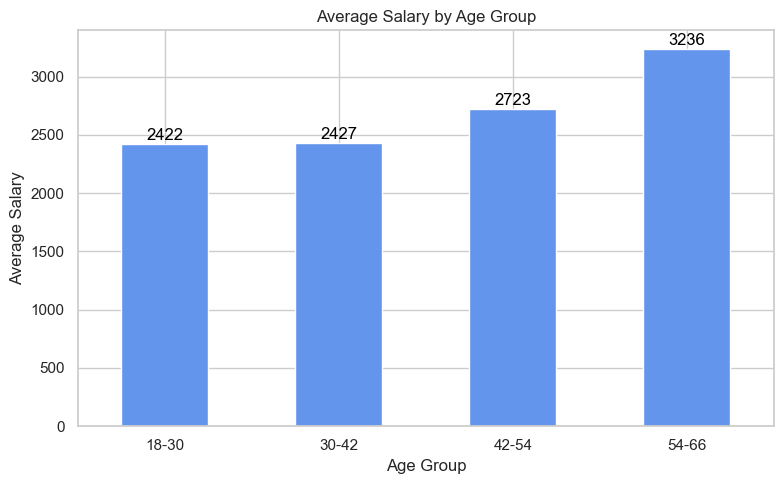

In [85]:
# Group by age group and calculate the average salary
age_salary_group = df.groupby('age_group')['salary'].mean()

# Print the result to see the average salary by age group
print("Average Salary by Age Group:")
print(age_salary_group)

# Plot the average salary by age group
plt.figure(figsize=(8, 5))
ax = age_salary_group.plot(kind='bar', color='cornflowerblue')

# Set plot labels and title
plt.title('Average Salary by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Salary')
plt.xticks(rotation=0)

# Add labels on bars for better readability
for i in ax.patches:
    ax.annotate(f'{i.get_height():.0f}', (i.get_x() + i.get_width() / 2, i.get_height()), 
                ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 3), textcoords='offset points')

plt.tight_layout()
plt.show()


Salary seems to be somewhat tied to age, maybe age is correlated to years of service. 